<div style="background-color: #F7FFE5;
            font-family:Courier, monospace;
            color:#435B66">
<div style="padding:20px; 
            margin-y: 20px;
            font-family: Consolas;
            font-size:250%;
            text-align:center;
            font-weight:700">Sales analysis - Extracting stories</div>
<div style="padding:20px; 
            font-size:130%;
            text-align:center;
            font-weight:800">The goal of this notebook is to analyse the sales of a superstore and extracting the reasons for the outcoming behaviour <br>
    </div>
    </div>

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Importing Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
palette_color = sns.color_palette('crest')
sns.set()

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Loading the superstore data</div>

In [2]:
raw_data=pd.read_csv('https://github.com/usersuman/sales_strategies/sales_data.csv',encoding='windows-1252')
raw_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#Just trying to copy the data, ensuring that the main data will not change anyway throughout the process
data=raw_data.copy()
data.shape

(9994, 21)

In [4]:
#Checking if the data contains any NULL values or not
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
#Exploring the features of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Orders Analysis</div>

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

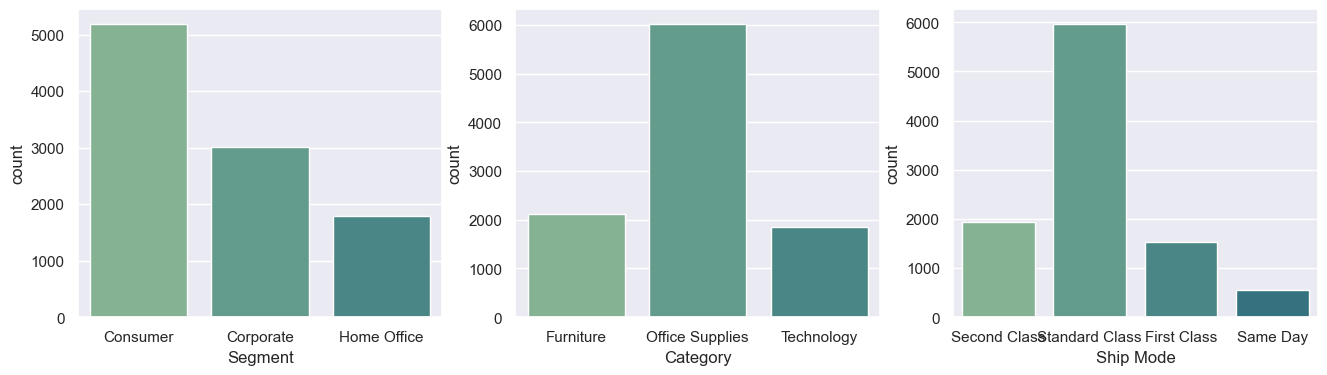

In [6]:
_,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.countplot(x='Segment',data=data,ax=axes[0],palette=palette_color)
sns.countplot(x='Category',data=data,ax=axes[1],palette=palette_color)
sns.countplot(x='Ship Mode',data=data,ax=axes[2],palette=palette_color)

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
Most of the orders are in Consumer segment, and the dominance of office supplies and standard class in the ordered  catagory and shipping mode respectively.<br></br>
Trying to figure out the reasons for the dominance...I think the store have good quality office supplies products and the other shipping modes are not much effective(lets check it by the shipping_time of the orders)</div>

In [7]:
data['Order Date']=pd.to_datetime(data['Order Date'],format='%m/%d/%Y')
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%m/%d/%Y')
data['shipping_time']=(data['Ship Date']-data['Order Date']).dt.days
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,shipping_time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


<AxesSubplot: xlabel='Ship Mode', ylabel='shipping_time'>

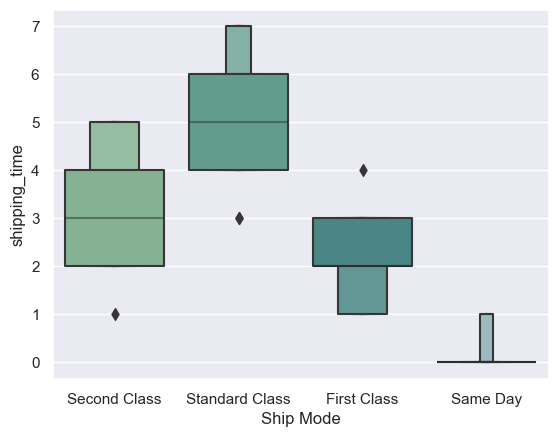

In [8]:
sns.boxenplot(y=data["shipping_time"],x=data["Ship Mode"],palette=palette_color)

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
Many of the orders of the second class shipping are taking 4 days at that time most of the standard class orders are shipped and the first class is also contains outliers that lowers their effectiveness.</div>

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Sales and Profit Analysis</div>

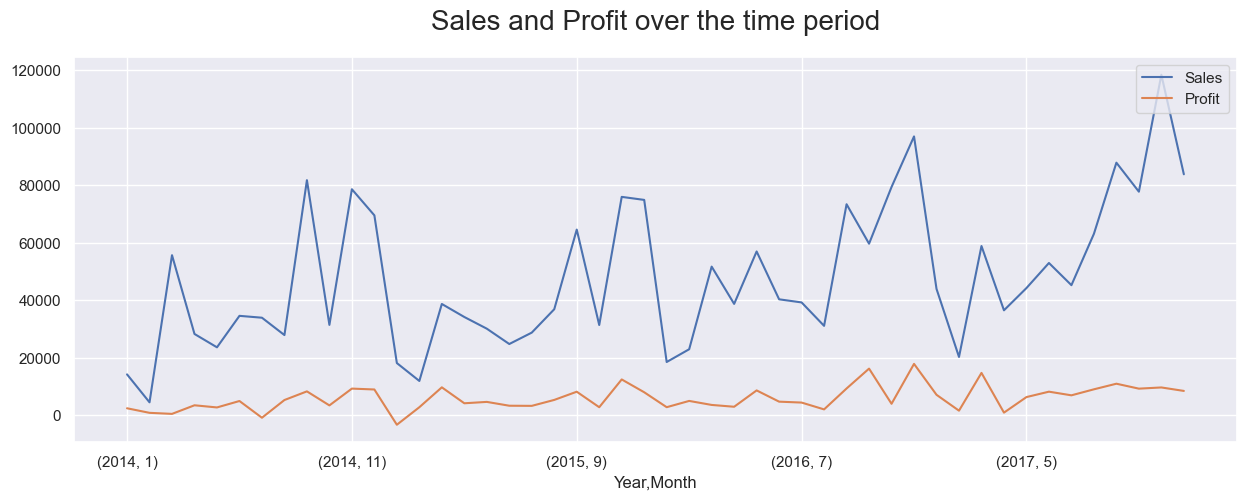

In [9]:
df=data[['Order Date','Sales','Profit']].copy()
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df.drop('Order Date',axis=1,inplace=True)
plt.figure(figsize=[15,5])
df.groupby(['Year','Month'])['Sales'].sum().plot()
df.groupby(['Year','Month'])['Profit'].sum().plot()
plt.title("Sales and Profit over the time period", size=20, pad=20)
plt.legend(["Sales", "Profit"], loc ="upper right")
plt.show()

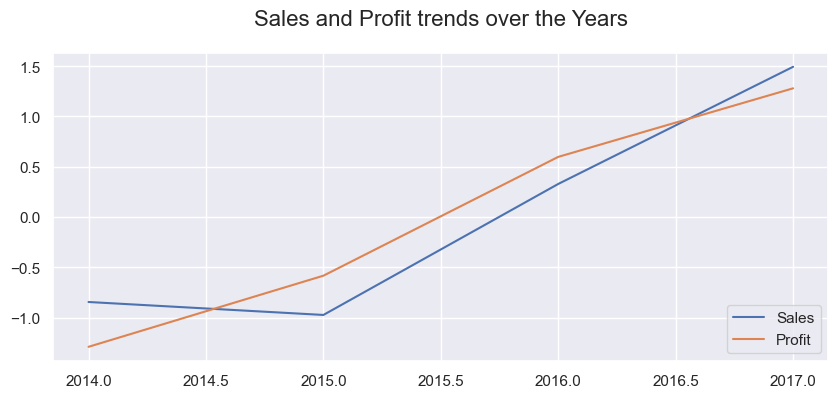

In [10]:
sales_trend=df.groupby('Year').sum().sort_values('Year')
scaler=StandardScaler()
sales_trend.Sales=scaler.fit_transform(sales_trend[['Sales']])
sales_trend.Profit=scaler.fit_transform(sales_trend[['Profit']])

plt.figure(figsize=[10,4])
plt.plot(sales_trend.index, 'Sales', data=sales_trend) 
plt.plot(sales_trend.index, 'Profit', data=sales_trend)
plt.title("Sales and Profit trends over the Years", size=16, pad=20)
plt.legend(["Sales", "Profit"], loc ="lower right")
plt.show()

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Customer Analysis</div>

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
    RFM method used for analyzing customer value (It groups customers based on their transaction history):  
    Recency — How many days ago was their last purchase  <br>                                                                           Frequency — How many times has the customer purchased from our store <br>                                                            Monetary Value — How much do they spend
    </div>

In [11]:
#Calculating the monetary recency and frquency of the customers
today=dt.datetime(2018,1,1)
rfm_data=data.groupby('Customer ID').agg({'Sales':lambda x: x.sum(),
                                           'Order Date':lambda x: (today-x.max()).days,
                                            'Order ID':lambda x: len(x)})
rename=['monetary', 'recency', 'frequency']
rfm_data.columns=rename
rfm_data.head()

,monetary,recency,frequency
Customer ID,,,
AA-10315,5563.560,186,11
AA-10375,1056.390,21,15
AA-10480,1790.512,261,12
AA-10645,5086.935,57,18
AB-10015,886.156,417,6


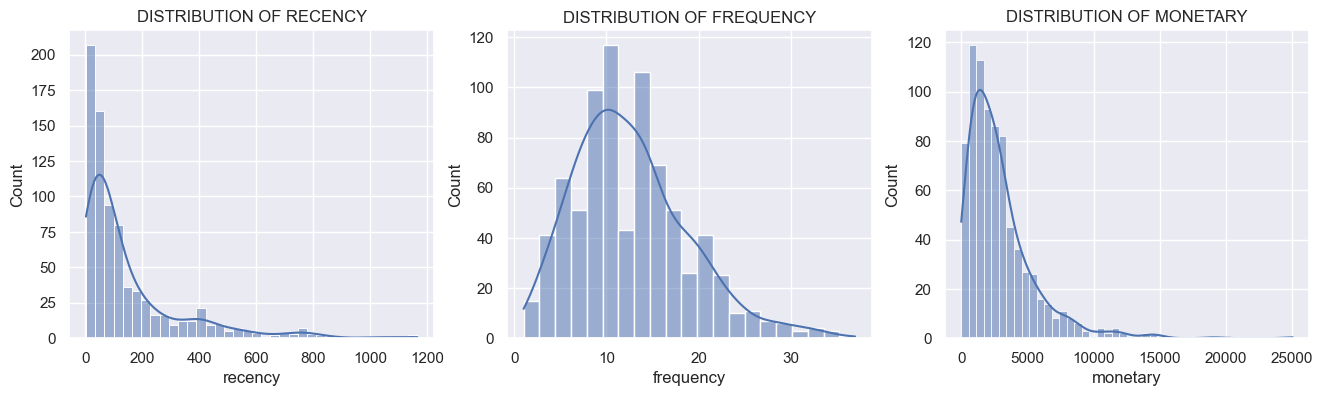

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1); sns.histplot(rfm_data['recency'],kde=True)
plt.title('DISTRIBUTION OF RECENCY')
plt.subplot(1, 3, 2); sns.histplot(rfm_data['frequency'],kde=True)
plt.title('DISTRIBUTION OF FREQUENCY')
plt.subplot(1, 3, 3); sns.histplot(rfm_data['monetary'],kde=True)
plt.title('DISTRIBUTION OF MONETARY')
plt.show()

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
In clustering data should be standardized because otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired</div>

In [13]:
#StandardScaler makes mean = 0 and scales the data to unit variance
scaler=StandardScaler()
scaled_data=scaler.fit_transform(rfm_data)
scaled_rfm=pd.DataFrame(scaled_data,columns=['monetary','recency','frequency'])
scaled_rfm.head()

,monetary,recency,frequency
0,1.015112,0.199889,-0.256912
1,-0.700590,-0.686762,0.384256
2,-0.421139,0.602912,-0.096620
3,0.833680,-0.493311,0.865131
4,-0.765391,1.441199,-1.058371


<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
Identifying the effective number of clusters by ELBOW method</div>

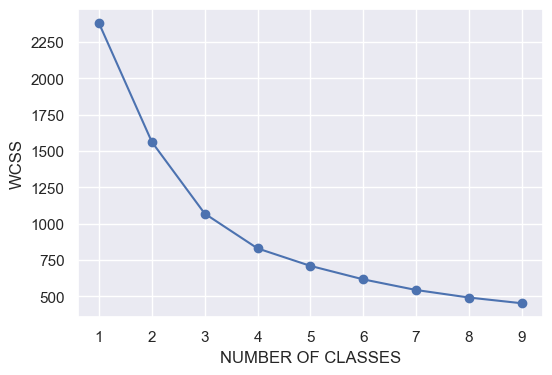

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i,random_state=44)
    kmeans.fit(scaled_rfm)
    wcss.append(kmeans.inertia_)
clus_no=range(1,10)
plt.subplots(figsize=(6,4))
plt.scatter(clus_no,wcss)
plt.plot(clus_no,wcss)
plt.xlabel('NUMBER OF CLASSES')
plt.ylabel('WCSS')
plt.show()

In [15]:
#By the plot ,the most effective k is equals to 4
kmeans=KMeans(4,random_state=44)
kmeans.fit(scaled_data)
rfm_data['Clusters']=kmeans.fit_predict(scaled_rfm)
rfm_data.head()

,monetary,recency,frequency,Clusters
Customer ID,,,,
AA-10315,5563.560,186,11,3
AA-10375,1056.390,21,15,3
AA-10480,1790.512,261,12,1
AA-10645,5086.935,57,18,3
AB-10015,886.156,417,6,2


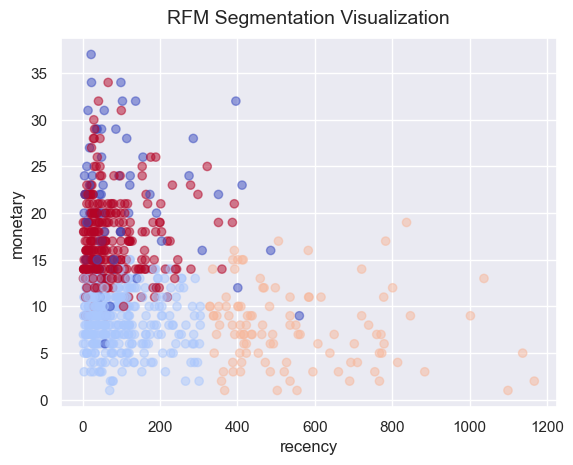

In [16]:
plt.scatter(rfm_data['recency'],rfm_data['frequency'],c=rfm_data['Clusters'],cmap='coolwarm',alpha=0.5)
plt.xlabel('recency')
plt.ylabel('monetary')
plt.title('RFM Segmentation Visualization',size=14,pad=10)
plt.show()

In [17]:
#Identifing each cluster by their average rfm values 
rfm_data.groupby('Clusters').mean()

,monetary,recency,frequency
Clusters,,,
0,9457.539378,111.730159,21.142857
1,1548.773829,95.543103,8.781609
2,1574.658788,544.619048,7.800000
3,3599.506911,74.104693,17.281588


In [18]:
# Declaring indicated customer_type to different types by their cluster means
rfm_data['Customer_type']=rfm_data['Clusters'].map({0:'Champions',1:'loyal customer',3:'potential Customer',2:'Needs Attention'})
rfm_data.head()

,monetary,recency,frequency,Clusters,Customer_type
Customer ID,,,,,
AA-10315,5563.560,186,11,3,potential Customer
AA-10375,1056.390,21,15,3,potential Customer
AA-10480,1790.512,261,12,1,loyal customer
AA-10645,5086.935,57,18,3,potential Customer
AB-10015,886.156,417,6,2,Needs Attention


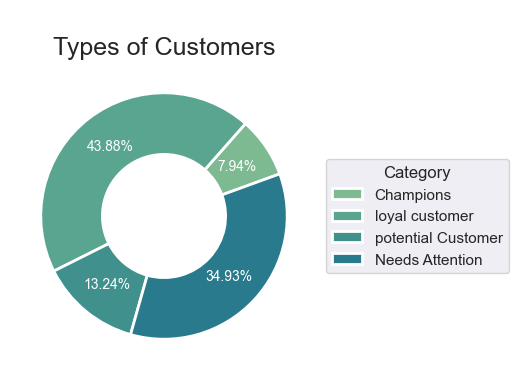

In [19]:
plt.subplots(figsize=(20, 4))

labels = 'Champions','loyal customer','potential Customer','Needs Attention'
wedges, texts, autotexts = plt.pie([rfm_data.loc[rfm_data.Clusters==0].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==1].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==2].shape[0],
                                    rfm_data.loc[rfm_data.Clusters==3].shape[0]],
                                   textprops=dict(size= 10, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    colors = palette_color,
                                    wedgeprops=dict(width=0.5,linewidth = 2),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nTypes of Customers",fontsize=18);
plt.show()

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
Can see that about 35% of our customers needs attention.. that is a lot .. so trying to figure out the reasons for this result from the given data </div>

In [20]:
#Adding customer_type feature to the orders_data
rfm_data.reset_index(level=0,inplace=True)
data=pd.merge(data,rfm_data[['Customer ID','Customer_type']],on='Customer ID')
df=data[['Ship Mode','Category','Discount','shipping_time','Customer_type']].copy()
df.head()

,Ship Mode,Category,Discount,shipping_time,Customer_type
0,Second Class,Furniture,0.0,3,Needs Attention
1,Second Class,Furniture,0.0,3,Needs Attention
2,First Class,Office Supplies,0.2,1,Needs Attention
3,Same Day,Furniture,0.6,0,Needs Attention
4,Same Day,Office Supplies,0.2,0,Needs Attention


In [21]:
df['is_target']=df['Customer_type'].map({'Champions':0,'loyal customer':0,'potential Customer':0,'Needs Attention':1})
df.drop(['Customer_type'],axis=1,inplace=True)
df.head()

,Ship Mode,Category,Discount,shipping_time,is_target
0,Second Class,Furniture,0.0,3,1
1,Second Class,Furniture,0.0,3,1
2,First Class,Office Supplies,0.2,1,1
3,Same Day,Furniture,0.6,0,1
4,Same Day,Office Supplies,0.2,0,1


<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
One possible reason can be the late delivery of the orders..checking how the customers are effected by this..<br>
Creating a new feature is_expected_delivery to check the specific order is deliveed in expected time</div>

In [22]:
def check_delivery(row):
    if row['Ship Mode']=='First Class' and row['shipping_time']>2:
        return 0
    elif row['Ship Mode']=='Second Class' and row['shipping_time']>3:
        return 0
    elif row['Ship Mode']=='Standard Class' and row['shipping_time']>5:
        return 0
    elif row['Ship Mode']=='Same Day' and row['shipping_time']>1:
        return 0
    return 1
df['is_expected_delivery']=df.apply(lambda row: check_delivery(row),axis=1)
df.drop(['Ship Mode','shipping_time'],axis=1,inplace=True)
df.head()

,Category,Discount,is_target,is_expected_delivery
0,Furniture,0.0,1,1
1,Furniture,0.0,1,1
2,Office Supplies,0.2,1,1
3,Furniture,0.6,1,1
4,Office Supplies,0.2,1,1


In [23]:
dummies=pd.get_dummies(df['Category'],drop_first=True)  #DROPING THE FIRST COLUMN(as if all others are zero it indicates the left one)
df=pd.concat([df,dummies],axis=1)
df.drop(['Category'],axis=1,inplace=True)
df.head()

,Discount,is_target,is_expected_delivery,Office Supplies,Technology
0,0.0,1,1,0,0
1,0.0,1,1,0,0
2,0.2,1,1,1,0
3,0.6,1,1,0,0
4,0.2,1,1,1,0


In [24]:
input_data=df.loc[:,['Discount','is_expected_delivery','Office Supplies','Technology']]
target_data=df.loc[:,'is_target']
#scale the input data
#WARNING: DO NOT SCALE THE DUMMY VALUES  ---> input_data=absent_scaler.transform(input_data)
input_data.Discount=scaler.fit_transform(df[['Discount']])
input_data.head()

,Discount,is_expected_delivery,Office Supplies,Technology
0,-0.756643,1,0,0
1,-0.756643,1,0,0
2,0.212153,1,1,0
3,2.149747,1,0,0
4,0.212153,1,1,0


In [25]:
from sklearn.model_selection import train_test_split
#by_default train_size=0.75(preferable 0.8), shuffle is by default True, for any int in random state it will give same shuffled data if the in value is same 

input_train,input_test,target_train,target_test=train_test_split(input_data,target_data,
                                                                 train_size=0.8,shuffle=True,random_state=44)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(input_train,target_train)
print(model.score(input_train,target_train))               #Accuracy of the model

features=input_data.columns.values
coefficients=model.coef_                                    #it returns a column
intercept=model.intercept_
summary=pd.DataFrame(columns=['features'],data=features)
summary['values']=np.transpose(coefficients)               # but,it takes array so we have to transpose it 
summary

0.918323952470294


,features,values
0,Discount,-0.009881
1,is_expected_delivery,0.172129
2,Office Supplies,-0.006712
3,Technology,-0.143398


<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Interpreting the coefficients</div>

In [26]:
summary.loc[4]=['intercept',intercept[0]]
summary

,features,values
0,Discount,-0.009881
1,is_expected_delivery,0.172129
2,Office Supplies,-0.006712
3,Technology,-0.143398
4,intercept,-2.509733


<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
In Logistic regression all the coefficients refers to the log odds, so taking their exponenetial value as odds_ratio for more clear interpretation (for a unit change in the standardized feature, the odds increases by a multiple of odds_ratio)<br></br>
So, a feature is not important:<br>
- if its coefficient is around 0<br>
- if its odds_ratio is around 1</div>

In [27]:
summary['odds_ratio']=np.exp(summary['values'])           
#as Logistic Regression we have to compare odds_ratio(exponential value of the weights of that feature)
summary=summary.sort_values('odds_ratio',ascending=False)
summary

,features,values,odds_ratio
1,is_expected_delivery,0.172129,1.187831
2,Office Supplies,-0.006712,0.993311
0,Discount,-0.009881,0.990167
3,Technology,-0.143398,0.866409
4,intercept,-2.509733,0.081290


<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
- Late delivery has an important effect on the customers <br>
- Discount is not an important feature.<br>
- Office Supplies and Technology are the dummy categories are created by droping category Furniture.Therefore, the base model is is for the furniture category.<br>  Office Supplies have odds_ratio very close to 1 so, Office Supplies and Furniture categories have similar impact but Techonogy having odds ratio of 0.86, so these category products have 14% less impact on the customers. 
</div>

In [28]:
#calculating the test accuracy
model.score(input_test,target_test)

0.9169584792396198

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:150%;
            text-align:center;
            font-weight:700">
Conclusion
</div>

<div style="background-color: #F7FFE5;
            padding:20px;
            font-family:Courier, monospace;
            color:#435B66;
            font-size:110%;
            font-weight:600">
- Profits earned in the recent years are degrades in comapre to the early years and the reason could be that around 35% of the customers are on the verge to lost<br>
- Late shippment of the orders has an important effect on the customers<br>
- Discount should be an important factor to the consumers but here it does not have any effect, this shows how negligible discount provided by the superstore <br>
- Technology category products have better image in the market than the other products of the superstore</div>